# Advanced Python for Data Science
### DS-GA-3001.001/.002/.003

### Homework Assignment 04
### Due date: 03/08/2021, 4:00PM
### Student's Name: Zhifan Nan
### Student's e-mail: zn2041@nyu.edu

# Problem 1 (100 points)

The task is to optimize your solutions by using "line_profiler". 

Your submission "spring2021_sol04_yourid.ipynb" will contain:
- the first part is your original solution (a solution that you originally wrote); 
- the second part is your final, optimized solution after using line_profiler; 
- both of which will include the line_profiler results, and your detailed comments.


The problem is to simulate a random motion of $n$ objects over a discrete time. 

Concretely, there is:
- a unit square $[0,1]^2$, 
- $n$ points within the unit square, 
- and the time is discrete $t=0, 1, 2, \dots$. 

At time $t=0$, the positions of $n$ points are randomly and uniformly distributed within the unit square; call these positions $\{p_0, p_1, p_2,\dots, p_{n-1}\}$. 

At every time step $t \geq 0$, every point $i$, chooses to randomly move in one of four directions: left, right, up, down. The distance is also random uniform number on $[0, \delta]$, where $\delta$ is given. 

That is, at every time step $t$ and for every $i$ we generate a random move as: 
$$ p_i := p_i + r_i \cdot u_i$$
where 
$$ r_i \sim uniform[0, \delta],$$ 
and 
$u_i$ represents a random direction, i.e. a randomly chosen vector among $(-1, 0), (1, 0), (0, -1), (0, 1)$.

**Dynamics**

Now, one would like to examine and plot the diagram of the minimum distance $d_{\min}$ among these $n$ points over $T$ iterations.

The task is to complete the rest of this notebook, where definitions of the functions main_orignal and main_optimized are given below. 

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
%load_ext line_profiler

---

### The original code description: 

Walkthrough: In this naive solution, for every time stamp, I used a nested loop to iterate through 1000 data points and find the minimum distance, which should has a time complexity of $O(n^{2})$. And then, I used a for loop to update each data point one by one, and only update those that are still within the boundary after moving. 

Comments: After profiling the code, the whole function takes around 103s, and finding the minimum distance is the most time consuming part, which takes more than 90 percent of the total running time. Updating the positions of data points also took a bit long than I expect, so these are the two parts that I will focus on optimizing.

---


In [53]:
def main_original(n, delta, T): 
    """ 
    n: is the number of uniformly at random generated points in the unit square 
    delta: a maximal move of a point in one of four random directions: left, right, up, or down 
    T: number of iterations
    return: 
    lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
    it is a list of reals of length T"""
    pts = np.random.uniform(0, 1, size = (n, 2))
    u = np.array([[1,0], [0,1], [-1,0], [0,-1]])
    lst_of_min_d = []
    
    for _ in range(T):
        
        min_d = np.sqrt(2)
        for i in range(n):
            for j in range(i+1, n):
                min_d = min(min_d, np.sqrt((pts[i][0] - pts[j][0])**2 + (pts[i][1] - pts[j][1])**2))
        lst_of_min_d.append(min_d)
        
        for pt in pts:
            u_i = u[np.random.randint(4)]
            d_i = np.random.uniform(0, delta, 1)
            move = u_i * d_i
            temp = pt + move
            if temp[0] >= 0 and temp[0] <= 1 and temp[1] >= 0 and temp[1] <= 1:
                pt += move

    return lst_of_min_d

In [54]:
n = 1500
delta = 1.0 / n
T = 20

In [55]:
%lprun -f main_original lst_min_dist = main_original(n, delta, T)

In [ ]:
Timer unit: 1e-07 s

Total time: 103.287 s
File: <ipython-input-53-e8002aabfd8c>
Function: main_original at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def main_original(n, delta, T): 
     2                                               """ 
     3                                               n: is the number of uniformly at random generated points in the unit square 
     4                                               delta: a maximal move of a point in one of four random directions: left, right, up, or down 
     5                                               T: number of iterations
     6                                               return: 
     7                                               lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
     8                                               it is a list of reals of length T"""
     9         1       1695.0   1695.0      0.0      pts = np.random.uniform(0, 1, size = (n, 2))
    10         1        114.0    114.0      0.0      u = np.array([[1,0], [0,1], [-1,0], [0,-1]])
    11         1          4.0      4.0      0.0      lst_of_min_d = []
    12                                               
    13        21        133.0      6.3      0.0      for _ in range(T):
    14                                                   
    15        20        911.0     45.5      0.0          min_d = np.sqrt(2)
    16     30020     106039.0      3.5      0.0          for i in range(n):
    17  22515000   81603481.0      3.6      7.9              for j in range(i+1, n):
    18  22485000  946417911.0     42.1     91.6                  min_d = min(min_d, np.sqrt((pts[i][0] - pts[j][0])**2 + (pts[i][1] - pts[j][1])**2))
    19        20        419.0     20.9      0.0          lst_of_min_d.append(min_d)
    20                                                   
    21     30020     180246.0      6.0      0.0          for pt in pts:
    22     30000    1235379.0     41.2      0.1              u_i = u[np.random.randint(4)]
    23     30000    1239699.0     41.3      0.1              d_i = np.random.uniform(0, delta, 1)
    24     30000     720653.0     24.0      0.1              move = u_i * d_i
    25     30000     290219.0      9.7      0.0              temp = pt + move
    26     30000     613973.0     20.5      0.1              if temp[0] >= 0 and temp[0] <= 1 and temp[1] >= 0 and temp[1] <= 1:
    27     29994     459908.0     15.3      0.0                  pt += move
    28                                           
    29         1          8.0      8.0      0.0      return lst_of_min_d

len: 20


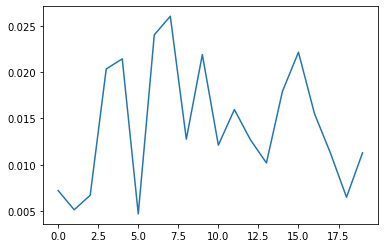

In [10]:
# plot the diagram of the minimum distances:
# where we rescale distance with by factor $\sqrt{n}$:
print("len:", len(lst_min_dist))
plt.plot(range(T), np.array(lst_min_dist) * np.sqrt(n))
plt.show()

---

### The optimized code description: 

Walkthrough: In this optimized solution, At each timestamp t, instead of updating points one by one, I generate all the updating steps using numpy 2d array's element-wise multiplication, and only update those points that are within the boundary after moving. Then I generate a distance matrix using numpy broadcasting and fill the diagonal with inf so that I can find a valid minimum value in the distance matrix, otherwise the minimum value will always be 0 on the diagonal. 

Comments: We got huge improvement by decreasing the running time to 2.8s, which is mostly saved by numpy's operation. First I replace the nested for loop by deriving a distance matrix and also update all points at the same time instead of update them one by one. 

---


In [94]:
def main_optimized(n, delta, T): 
    """ 
    n: is the number of uniformly at random generated points in the unit square 
    delta: a maximal move of a point in one of four random directions: left, right, up, or down 
    T: number of iterations
    return: 
    lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
    it is a list of reals of length T"""
    curr_pts = np.random.uniform(0, 1, size = (n, 2))
    u = np.array([[1,0], [0,1], [-1,0], [0,-1]])
    lst_of_min_d = []
    
    def populate_u(x):
        return u[x]
    
    def bound_check(pt):
        if pt[0] >= 0 and pt[1] >= 0 and pt[0] <= 1 and pt[1] <= 1:
            return True
        return False
    
    for t in range(T):
        ix_mat = np.random.randint(0, 4, size = n)
        u_mat = populate_u(ix_mat)
        delta_mat = np.random.uniform(0, delta, size = (n, 2))
        move_mat = u_mat * delta_mat
        
        temp_update = curr_pts + move_mat
        good_move = [i for i in range(n) if bound_check(temp_update[i])]
        curr_pts[good_move] += move_mat[good_move]
        
        dist_matrix = np.sqrt(np.sum((curr_pts.reshape(1, n, 2) - curr_pts.reshape(n, 1, 2))**2, -1))
        np.fill_diagonal(dist_matrix, np.inf)
        lst_of_min_d.append(dist_matrix.min())
        
    return lst_of_min_d

In [95]:
n = 1500
delta = 1.0 / n
T = 40

In [96]:
%lprun -f main_optimized lst_min_dist = main_optimized(n, delta, T)

In [ ]:
Timer unit: 1e-07 s

Total time: 2.80005 s
File: <ipython-input-85-f03971f915ed>
Function: main_optimized at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def main_optimized(n, delta, T): 
     2                                               """ 
     3                                               n: is the number of uniformly at random generated points in the unit square 
     4                                               delta: a maximal move of a point in one of four random directions: left, right, up, or down 
     5                                               T: number of iterations
     6                                               return: 
     7                                               lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
     8                                               it is a list of reals of length T"""
     9         1        453.0    453.0      0.0      curr_pts = np.random.uniform(0, 1, size = (n, 2))
    10         1         80.0     80.0      0.0      u = np.array([[1,0], [0,1], [-1,0], [0,-1]])
    11         1          7.0      7.0      0.0      lst_of_min_d = []
    12                                               
    13         1          8.0      8.0      0.0      def populate_u(x):
    14                                                   return u[x]
    15                                               
    16         1          6.0      6.0      0.0      def bound_check(pt):
    17                                                   if pt[0] >= 0 and pt[1] >= 0 and pt[0] <= 1 and pt[1] <= 1:
    18                                                       return True
    19                                                   return False
    20                                               
    21        41        504.0     12.3      0.0      for t in range(T):
    22        40      23597.0    589.9      0.1          ix_mat = np.random.randint(0, 4, size = n)
    23        40      10917.0    272.9      0.0          u_mat = populate_u(ix_mat)
    24        40      14224.0    355.6      0.1          delta_mat = np.random.uniform(0, delta, size = (n, 2))
    25        40       4925.0    123.1      0.0          move_mat = u_mat * delta_mat
    26                                                   
    27        40       4204.0    105.1      0.0          temp_update = curr_pts + move_mat
    28        40    1236210.0  30905.2      4.4          good_move = [i for i in range(n) if bound_check(temp_update[i])]
    29        40     116971.0   2924.3      0.4          curr_pts[good_move] += move_mat[good_move]
    30                                                   
    31        40   26099828.0 652495.7     93.2          dist_matrix = np.sqrt(np.sum((curr_pts.reshape(1, n, 2) - curr_pts.reshape(n, 1, 2))**2, -1))
    32        40      17440.0    436.0      0.1          np.fill_diagonal(dist_matrix, np.inf)
    33        40     471116.0  11777.9      1.7          lst_of_min_d.append(dist_matrix.min())
    34                                                   
    35         1          6.0      6.0      0.0      return lst_of_min_d

len: 40


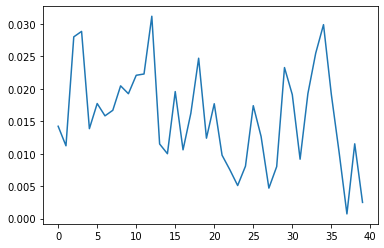

In [97]:
# plot the diagram of the minimum distances:
# where we rescale distance by a factor $\sqrt{n}$:
print("len:", len(lst_min_dist))
plt.plot(range(T), np.array(lst_min_dist) * np.sqrt(n))
plt.show()